In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('nmr_smile_solvent_web_sat_combined2.csv')['SMILES']
length = []
for i in data:
    length.append(len(i))
pct = [10, 20, 50, 80, 85, 90, 95, 96, 97, 98, 99, 99.95, 100]
length = np.percentile(np.array(length), pct)
pd.DataFrame({'pct': pct, 'smile length': length})

pct  smile length
0    10.00       24.0000
1    20.00       40.0000
2    50.00      133.0000
3    80.00      250.0000
4    85.00      285.0000
5    90.00      319.0000
6    95.00      382.0000
7    96.00      409.1200
8    97.00      457.0000
9    98.00      520.0600
10   99.00      631.5300
11   99.95      935.5765
12  100.00     1330.0000

In [3]:
data_filtered = pd.read_csv('nmr_smile_solvent_filtered_3dgnn.csv')
data_filtered.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'File_name', 'SMILES',
       'Solvent'],
      dtype='object')

In [4]:
H_MIN = 0
H_MAX = 10
C_MIN = 0
C_MAX = 200

In [6]:
csv_path = '/Users/siriusxiao/Documents/Github/2DNMR_data/csv_30k'
file_list = os.listdir(csv_path)

In [62]:
len(file_list)

28876

In [8]:
file_list_filtered = data_filtered['File_name'].to_list()
# file_list_filtered

In [18]:
# use C as x-axis and H shift as Y on corresponding C shift
base = "C"
output_path = '/Users/siriusxiao/Documents/GitHub/2DNMR_data/nmr_1dcsv_%s_30k'%base
if not os.path.exists(output_path):
    os.mkdir(output_path)

ct = 0
for file in file_list_filtered:
    if file == '.DS_Store':
        continue
    # print(file)
    tmp = pd.read_csv(os.path.join(csv_path, file))
    tmp = tmp[['1H', '13C']]
    tmp_new = pd.DataFrame(columns=['1H', '13C'])
    if base =='H':
        grid = 0.01
        tmp_new['1H'] = np.arange(H_MIN, H_MAX + grid, grid)
        tmp_new['13C'] = 0
        for i in range(len(tmp)):
            H, C = tmp.iloc[i]
            if (isinstance(H, str)):
                print(file)
            H_idx = int(H/grid)
            if H < H_MIN:
                tmp_new.loc[H_MIN, '13C'] = C
            elif H > H_MAX:
                tmp_new.loc[H_MAX, '13C'] = C
            else:
                if tmp_new.loc[H_idx, '13C'] == 0:
                    # If the location is not taken, set 'C' value there
                    tmp_new.loc[H_idx, '13C'] = C
                else:
                    # print(file, H_idx)
                    # If the location is taken, find the next available location within the following 10 rows
                    for offset in range(1, 11):  # Check the next 10 rows
                        if H_idx + offset < len(tmp_new) and tmp_new.loc[H_idx + offset, '13C'] == 0:
                            tmp_new.loc[H_idx + offset, '13C'] = C
                            break
    else:
        grid = 0.1 #C
        tmp_new['13C'] = np.arange(C_MIN, C_MAX + grid, grid)
        tmp_new['1H'] = 0
        for i in range(len(tmp)):
            H, C = tmp.iloc[i]
            if (isinstance(C, str)):
                print(file)
            C_idx = int(round(C/grid))
            if C < C_MIN:
                tmp_new.loc[C_MIN, '1H'] = H
            elif C > C_MAX:
                tmp_new.loc[C_MAX, '1H'] = H
            else:
                if tmp_new.loc[C_idx, '1H'] == 0:
                    # If the location is not taken, set 'H' value there
                    tmp_new.loc[C_idx, '1H'] = H
                else:
                    # print(file, H_idx)
                    # If the location is taken, find the next available location within the following 10 rows
                    for offset in range(1, 11):  # Check the next 10 rows
                        if C_idx + offset < len(tmp_new) and tmp_new.loc[C_idx + offset, '1H'] == 0:
                            tmp_new.loc[C_idx + offset, '1H'] = H
                            break

    tmp_new.to_csv(os.path.join(output_path, file))
    ct +=1


/var/folders/xw/lqj29fkj5nvgpl53v5y2frhr0000gn/T/ipykernel_35310/747897541.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tmp_new.loc[C_idx, '1H'] = H
/var/folders/xw/lqj29fkj5nvgpl53v5y2frhr0000gn/T/ipykernel_35310/747897541.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1.39' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tmp_new.loc[C_idx, '1H'] = H
/var/folders/xw/lqj29fkj5nvgpl53v5y2frhr0000gn/T/ipykernel_35310/747897541.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.57' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tmp_new.loc[C_idx, '1H'] = H
/var/folders/xw/lqj29fkj5nvgp

In [15]:
28.9/0.1

288.99999999999994

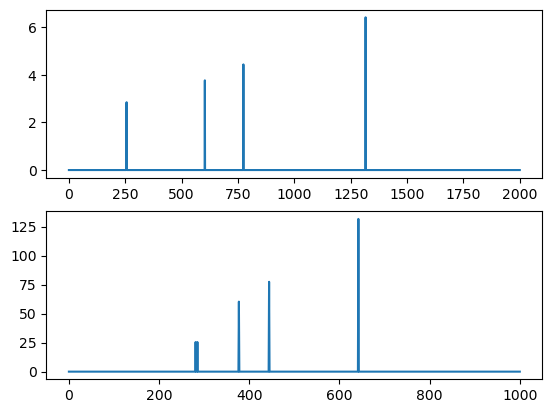

In [26]:
# visualize
i = 500
file = file_list_filtered[i]
base = "C"
output_path = '/Users/siriusxiao/Documents/GitHub/2DNMR_data/nmr_1dcsv_%s_30k'%base
H = pd.read_csv(os.path.join(output_path, file))['1H']
plt.subplot(211)
plt.plot(np.arange(len(H)), H)

output_path = '/Users/siriusxiao/Documents/GitHub/2DNMR_data/nmr_1dcsv_30k'
C = pd.read_csv(os.path.join(output_path, file))['13C']
plt.subplot(212)
plt.plot(np.arange(len(C)), C)


In [58]:
ct

28875

In [37]:
tmp = pd.read_csv('/Users/siriusxiao/Documents/GitHub/2DNMR_data/data_websat/csv_30k/15141.csv')
tmp = tmp[['1H', '13C']]

In [46]:
tmp_new = pd.DataFrame(columns=['1H', '13C'])
grid = 0.01
tmp_new['1H'] = np.arange(H_MIN, H_MAX + grid, grid)
tmp_new['13C'] = 0
for i in range(len(tmp)):
    H, C = tmp.iloc[i]
    H_idx = int(H/grid)
    # print(i, H_idx)
    if H < H_MIN:
        tmp_new.loc[H_MIN, '13C'] = C
    elif H > H_MAX:
        tmp_new.loc[H_MAX, '13C'] = C
    else:
        if tmp_new.loc[H_idx, '13C'] == 0:
            print(i, H_idx)
            # If the location is not taken, set 'C' value there
            tmp_new.loc[H_idx, '13C'] = C
        else:
            print(i, H_idx, tmp_new.loc[H_idx, '13C'])
            # If the location is taken, find the next available location within the following 10 rows
            for offset in range(1, 11):  # Check the next 10 rows
                if H_idx + offset < len(tmp_new) and tmp_new.loc[H_idx + offset, '13C'] == 0:
                    tmp_new.loc[H_idx + offset, '13C'] = C
                    print(H_idx + offset, C)
                    break

0 602
1 634
2 293
3 198
4 10
5 533
6 210
7 219
8 111
9 457
10 442
11 206
12 214
13 210 39.2
211 25.6
14 99
15 98
16 628
17 761
18 703
19 692
20 708
21 393


In [40]:
tmp

1H    13C
0   6.02   91.0
1   6.34  139.9
2   2.93   32.2
3   1.98   37.3
4   0.10   37.3
5   5.33   76.7
6   2.10   39.2
7   2.19   45.8
8   1.11   12.9
9   4.57   64.0
10  4.42   64.0
11  2.07   20.9
12  2.14   43.4
13  2.11   25.6
14  0.99   22.3
15  0.98   22.3
16  6.28  115.4
17  7.61  145.0
18  7.03  109.4
19  6.92  114.7
20  7.08  123.0
21  3.93   55.9

In [29]:
tmp_new = pd.DataFrame(columns=['1H', '13C'])
grid = 0.01
tmp_new['1H'] = np.arange(H_MIN, H_MAX + grid, grid)
tmp_new['13C'] = 0
for i in range(len(tmp)):
    H, C = tmp.iloc[i]
    H_idx = int(H/grid)
    if H_idx < H_MIN:
        tmp_new.loc[H_MIN, '13C'] = C
    elif H_idx > H_MAX:
        tmp_new.loc[H_MAX, '13C'] = C
    else:
        tmp_new.loc[H_idx, '13C'] = C

In [30]:
tmp_new

1H  13C
0      0.00  0.0
1      0.01  0.0
2      0.02  0.0
3      0.03  0.0
4      0.04  0.0
...     ...  ...
996    9.96  0.0
997    9.97  0.0
998    9.98  0.0
999    9.99  0.0
1000  10.00  0.0

[1001 rows x 2 columns]

In [20]:
H_idx

480

In [15]:
data_all = pd.read_csv('./data/nmr_smile_solvent_web_sat_combined2.csv')
data_all.head()
nmr_length = []
csv_path = '/Users/siriusxiao/Documents/GitHub/2DNMR_data/data_websat/nmr_1dcsv_30k'
for i in range(len(data_all)):
    file = data_all.iloc[i]['File_name']
    nmr = pd.read_csv(os.path.join(csv_path, file))
    nmr_length.append(len(np.where(nmr['13C']!=0)[0]))


In [17]:
data_all['nmr_length'] = nmr_length
data_all['smile_length'] = data_all['SMILES'].str.len()

In [25]:
data_all.head()

Unnamed: 0.1  Unnamed: 0  File_name  \
0             0           0  18162.csv   
1             1           1  18164.csv   
2             2           2  18188.csv   
3             3           3  18196.csv   
4             4           4  18197.csv   

                                              SMILES  Solvent  nmr_length  \
0  C[C@H]1[C@H]2CC[C@@H]3[C@@]2(CC[C@H]4[C@H]3CC=...    CDCl3          25   
1  C[C@H]1[C@H]2CC[C@@H]3[C@@]2(CC[C@H]4[C@H]3CC=...    CDCl3          25   
2  C#C[C@@H](/C=C/CCCCCCCCCCC/C=C\CCCCCCCCC/C=C/[...    CDCl3          18   
3  C1CNC(=O)/C(=N/O)/CC2=CC(=C(C(=C2)Br)O)OC3=C(C...    C5D5N          18   
4  C1CNC(=O)/C(=N/O)/CC2=CC(=C(C(=C2)Br)O)OC3=C(C...  DMSO-d6          17   

   smile_length  
0            79  
1            77  
2            58  
3           118  
4           118

In [27]:
data_all['nmr_length'].corr(data_all['smile_length'])

0.7364283840330745

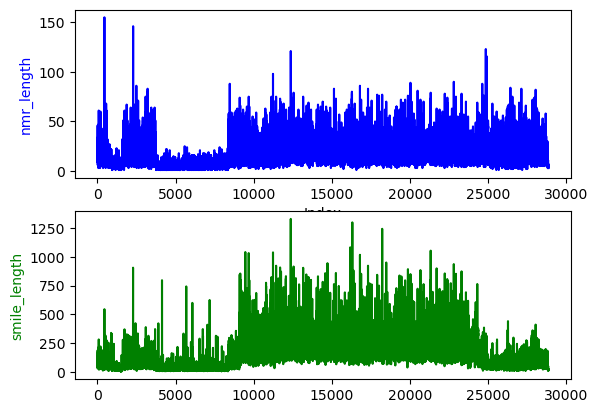

In [31]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,1)

# Plotting 'col1' on the first y-axis
ax1.plot(data_all.index, data_all['nmr_length'], color='blue', label='col1')
ax1.set_xlabel('Index')
ax1.set_ylabel('nmr_length', color='blue')

# Creating a second y-axis for 'col2'

ax2.plot(data_all.index, data_all['smile_length'], color='green', label='col2')
ax2.set_ylabel('smile_length', color='green')

# Showing the plot
plt.show()

In [33]:
pct = [10, 20, 50, 80, 85, 90, 95, 96, 97, 98, 99, 99.95, 100]
length = np.percentile(np.array(data_all['nmr_length']), pct)
pd.DataFrame({'pct': pct, 'nmr length': length})

pct  nmr length
0    10.00         5.0
1    20.00         8.0
2    50.00        16.0
3    80.00        26.0
4    85.00        28.0
5    90.00        32.0
6    95.00        38.0
7    96.00        41.0
8    97.00        44.0
9    98.00        50.0
10   99.00        57.0
11   99.95        86.0
12  100.00       155.0